In [ ]:
#TASK 04 CHURN PREDICTION MODEL

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('Telecom_customer_churn_analysis.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.shape

(7043, 21)

In [9]:
df=df.drop(['customerID','MultipleLines'],axis=1)

In [13]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [14]:
df['Partner']=df['Partner'].replace(['Yes','No'],[1,0])
df['Dependents']=df['Dependents'].replace(['Yes','No'],[1,0])

<Axes: xlabel='Partner', ylabel='count'>

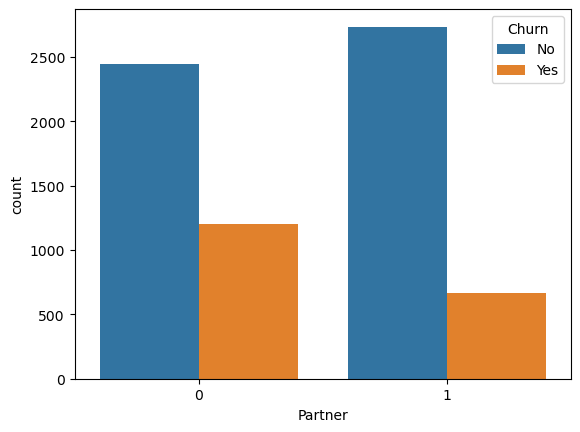

In [16]:
sns.countplot(data=df, x='Partner', hue='Churn')

In [17]:
df['PhoneService']=df['PhoneService'].replace(['Yes','No'],[1,0])
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

<Axes: xlabel='InternetService', ylabel='count'>

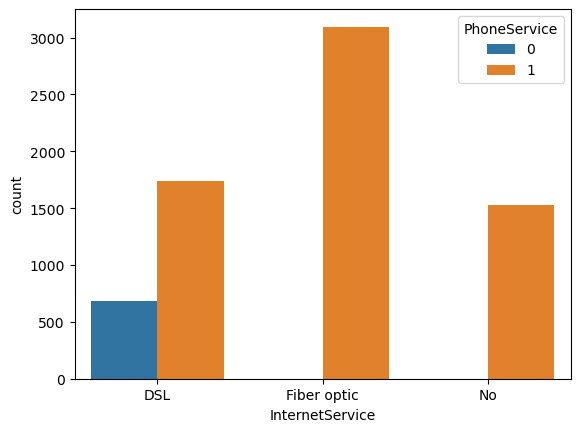

In [18]:
sns.countplot(x='InternetService',hue='PhoneService',data=df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [21]:

print(df['OnlineSecurity'].unique())
print(df['OnlineBackup'].unique())

['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']


In [22]:

df['OnlineSecurity']=df['OnlineSecurity'].replace(['Yes','No','No internet service'],[1,0,-1])
df['OnlineSecurity'].unique()

array([ 0,  1, -1], dtype=int64)

<Axes: xlabel='OnlineSecurity', ylabel='count'>

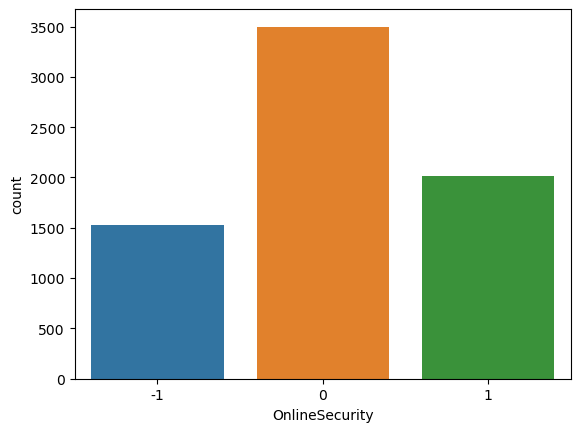

In [23]:
sns.countplot(x='OnlineSecurity',data=df)

In [32]:
df['OnlineBackup']=df['OnlineBackup'].replace(['Yes','No','No internet service'],[1,0,-1])
df['OnlineBackup'].unique()

array([ 1,  0, -1], dtype=int64)

<Axes: xlabel='OnlineBackup', ylabel='count'>

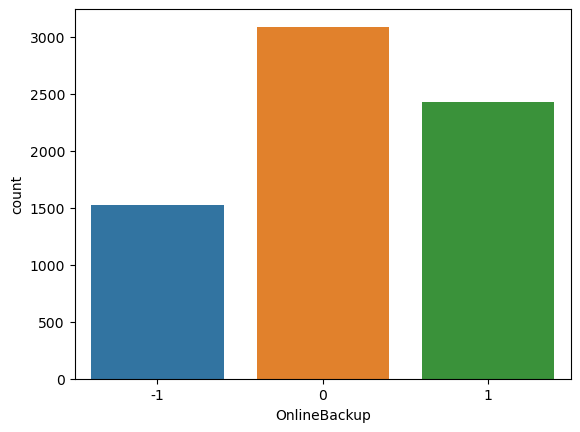

In [33]:
sns.countplot(x='OnlineBackup',data=df)

In [34]:
df['OnlineBackup']=df['OnlineBackup'].replace(['Yes','No','No internet service'],[1,0,-1])
df['OnlineBackup'].unique()

array([ 1,  0, -1], dtype=int64)

<Axes: xlabel='OnlineBackup', ylabel='count'>

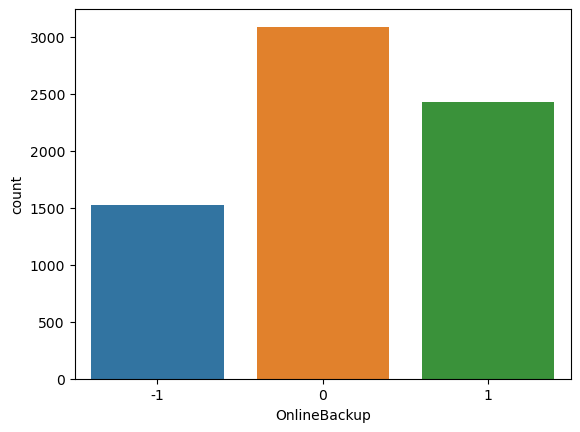

In [35]:
sns.countplot(x='OnlineBackup',data=df)

In [36]:
df['OnlineBackup']=df['OnlineBackup'].replace(['Yes','No','No internet service'],[1,0,-1])
df['OnlineBackup'].unique()

array([ 1,  0, -1], dtype=int64)

<Axes: xlabel='OnlineBackup', ylabel='count'>

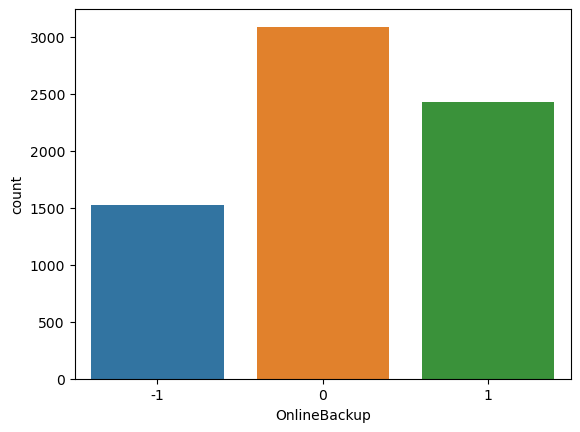

In [37]:

sns.countplot(x='OnlineBackup',data=df)

In [39]:
df['OnlineBackup']=df['OnlineBackup'].replace(['Yes','No','No internet service'],[1,0,-1])
df['OnlineBackup'].unique()


array([ 1,  0, -1], dtype=int64)

In [40]:
df['DeviceProtection']=df['DeviceProtection'].replace(['Yes','No','No internet service'],[1,0,-1])
df['DeviceProtection'].unique()

array([ 0,  1, -1], dtype=int64)

<Axes: xlabel='OnlineBackup', ylabel='count'>

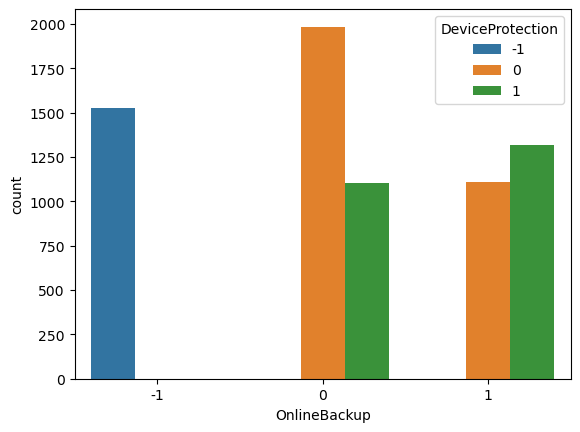

In [41]:
sns.countplot(x='OnlineBackup',hue='DeviceProtection',data=df)

In [42]:
df['StreamingTV']=df['StreamingTV'].replace(['Yes','No','No internet service'],[1,0,-1])
df['StreamingTV'].unique()

array([ 0,  1, -1], dtype=int64)

In [43]:
df['StreamingMovies']=df['StreamingMovies'].replace(['Yes','No','No internet service'],[1,0,-1])
df['StreamingMovies'].unique()

array([ 0,  1, -1], dtype=int64)

<Axes: xlabel='StreamingTV', ylabel='count'>

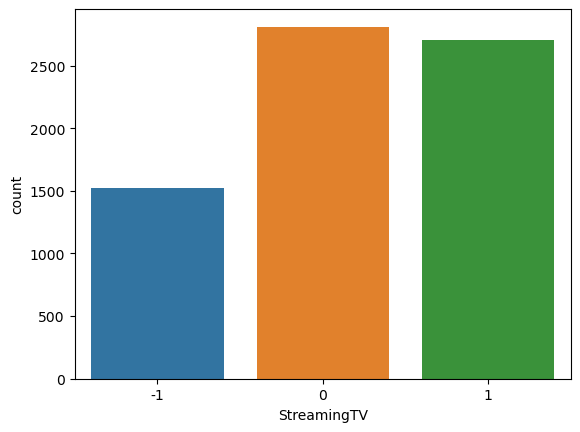

In [44]:

sns.countplot(x='StreamingTV',data=df)

<Axes: xlabel='StreamingMovies', ylabel='count'>

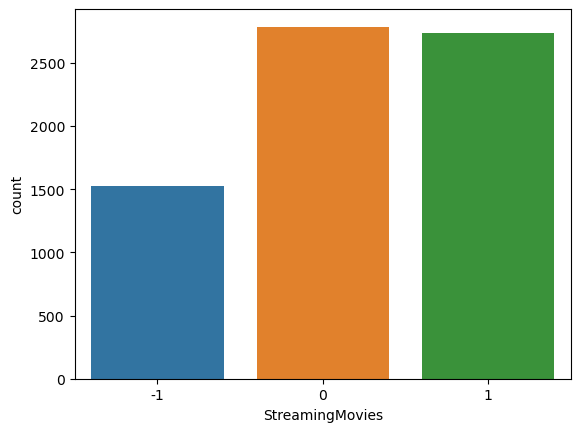

In [45]:
sns.countplot(x='StreamingMovies',data=df)

In [47]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [48]:
df['Contract']=df['Contract'].replace(['Month-to-month','One year','Two year'],[0,1,2])
df['Contract'].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='Contract', ylabel='count'>

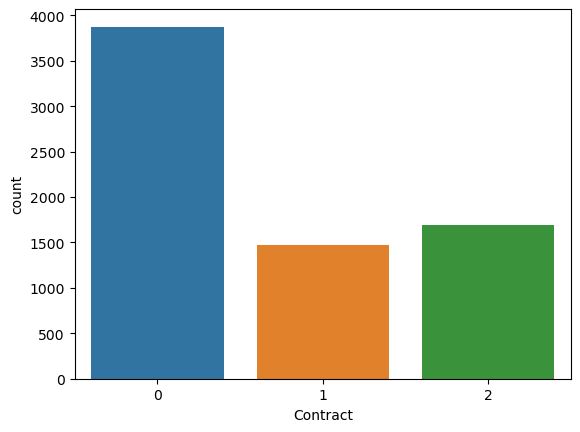

In [49]:
sns.countplot(x='Contract',data=df)

<Axes: xlabel='PaperlessBilling', ylabel='count'>

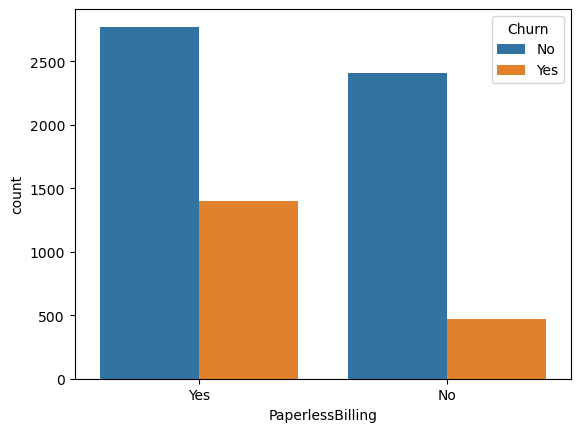

In [50]:
sns.countplot(x='PaperlessBilling',hue='Churn',data=df)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   int64  
 12  StreamingMovies   7043 non-null   int64  
 13  Contract          7043 non-null   int64  
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [27]:
train,test=train_test_split(df,test_size=0.2)

In [52]:
train.shape

(5634, 19)

In [53]:
test.shape

(1409, 19)

In [54]:

train_x=df[['SeniorCitizen','Partner','Dependents','tenure','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies','Contract','MonthlyCharges']]
train_y=df[['Churn']]

test_x=df[['SeniorCitizen','Partner','Dependents','tenure','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies','Contract','MonthlyCharges']]
test_y=df[['Churn']]

In [55]:
tree=DecisionTreeClassifier()
tree.fit(train_x,train_y)
predct=tree.predict(test_x)
metrics.accuracy_score(test_y,predct)

0.9910549481754934

In [58]:
lr_model = LogisticRegression()
lr_model.fit(train_x,train_y)
predct=lr_model.predict(test_x)
metrics.accuracy_score(test_y,predct)


0.7978134317762318

In [ ]:
#CONFUSION MATRIX

In [61]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

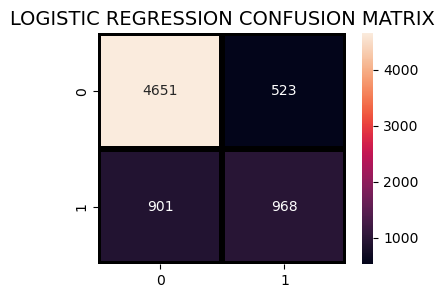

In [62]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(test_y, predct),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
#ROC CURVE

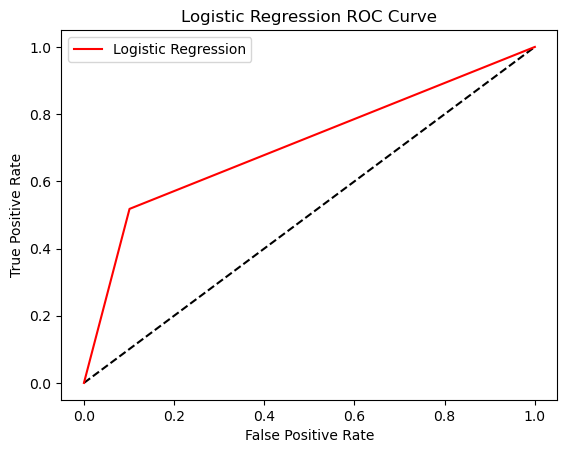

In [66]:
# Convert 'Yes' and 'No' in predct to 1 and 0, respectively
predct_binary = np.where(predct == 'Yes', 1, 0)

# Calculate ROC curve using the binary labels
fpr, tpr, thresholds = roc_curve(test_y_binary, predct_binary)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()B
plt.show()

plt.show()


In [ ]:
#TASK 06


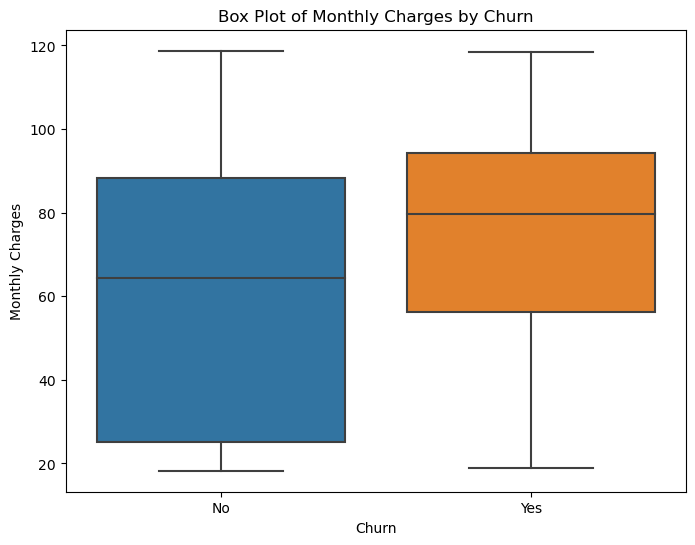

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example box plot for MonthlyCharges and Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Box Plot of Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


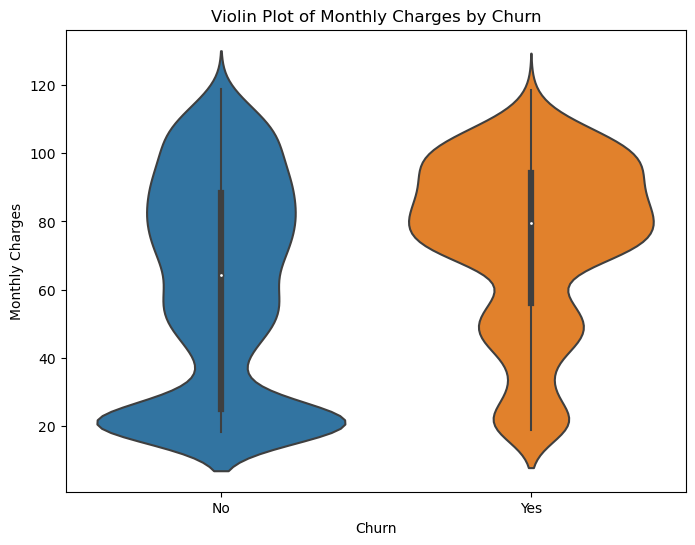

In [72]:
# Example violin plot for MonthlyCharges and Churn
plt.figure(figsize=(8, 6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Violin Plot of Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


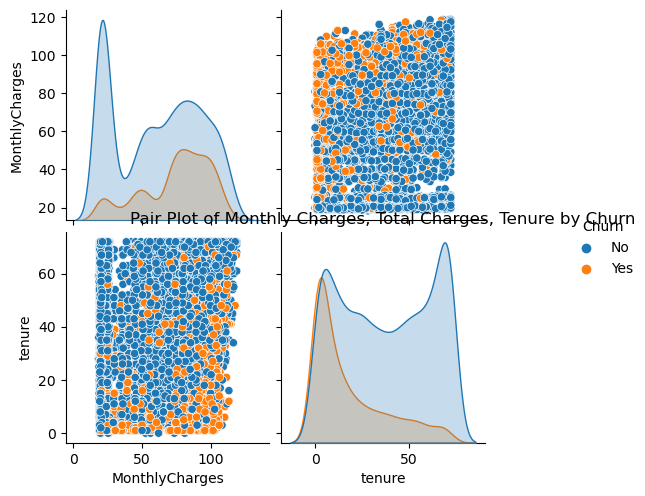

In [73]:
# Example pair plot for selected columns
sns.pairplot(df[['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']], hue='Churn')
plt.title('Pair Plot of Monthly Charges, Total Charges, Tenure by Churn')
plt.show()


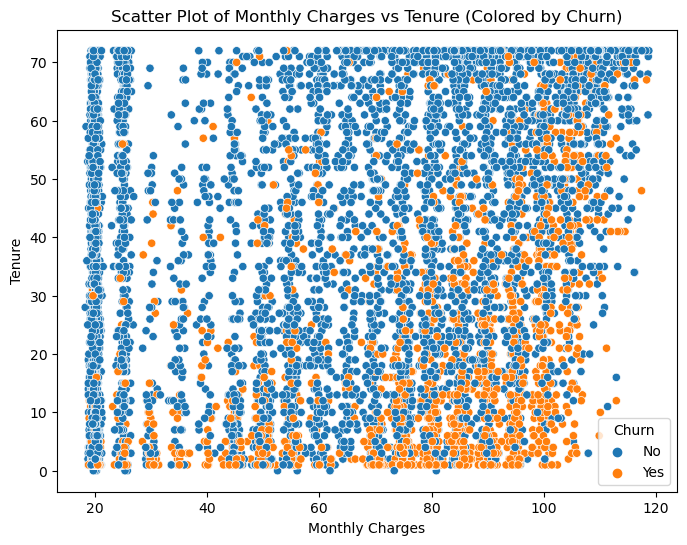

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example scatter plot for MonthlyCharges vs Tenure colored by Churn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='tenure', hue='Churn', data=df)
plt.title('Scatter Plot of Monthly Charges vs Tenure (Colored by Churn)')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.legend(title='Churn')
plt.show()
